In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import sys
from PIL import Image
import time
from IPython.display import display, Image
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL  


Using TensorFlow backend.


In [3]:
subdf = pd.read_csv('submission.csv')
subdf.shape
subdf['Image'][3218]

'image5367.jpg'

In [4]:
in_shape = 128

classifier = Sequential()

classifier.add(Convolution2D(32, 5, 5, input_shape = (in_shape, in_shape, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(128, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten( ))
classifier.add(Dense(output_dim = 512, activation = 'relu' ))
classifier.add(Dense(output_dim = 128, activation = 'relu' ))
classifier.add(Dense(output_dim = 4, activation = 'softmax' ))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(128, 128,..., activation="relu")`
  """
c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
  from ipykernel import kernelapp as app
c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\ipykernel

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('New data/data/train',
                                                target_size=(in_shape, in_shape),
                                                batch_size=64,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('New data/data/test',
                                            target_size=(in_shape, in_shape),
                                            batch_size=64,
                                            class_mode='categorical')

Found 7807 images belonging to 4 classes.
Found 2951 images belonging to 4 classes.


In [6]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [7]:
classifier.fit_generator(training_set,
                        steps_per_epoch=7808,
                        epochs=1,
                        validation_data=test_set,
                        validation_steps=2950)

Epoch 1/1
   9/7808 [..............................] - ETA: 1:26:45 - loss: 1.1918 - accuracy: 0.4549

KeyboardInterrupt: 

In [17]:
classifier.save('ModelFiles/classifier3.model')

In [19]:

CATEGORIES = ["Attire", "Decorationandsignage","Food", "misc"]  # will use this to convert prediction num to string value
in_shape = 128

def prepare(filepath):
    IMG_SIZE = in_shape  
    img_array = cv2.imread(filepath)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    
def prepareimg(img):
    IMG_SIZE = in_shape  
    new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("MOdelFiles/classifier2.model")


-0.033942222595214844
[[1. 0. 0. 0.]]
-0.017952919006347656
[[0. 0. 0. 1.]]


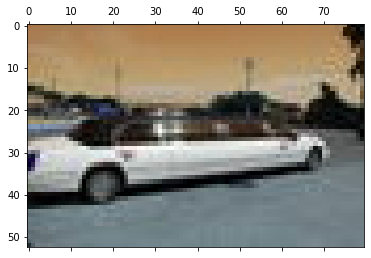

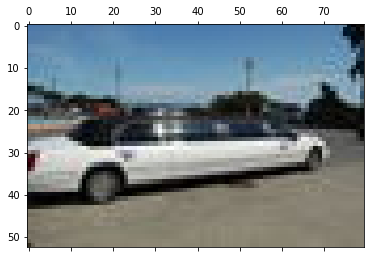

In [25]:
#filepath = 'dataset/Test Images/image22.jpg'
filepath = 'Test Images/image5367.jpg'
img = cv2.imread(filepath)
plt.matshow(img)

start =time.time()
prediction = model.predict([prepare(filepath)])
end = time.time()
print(start - end)
print(prediction)

start =time.time()
b,g,r = cv2.split(img)       
img = cv2.merge([r,g,b]) 
prediction = model.predict([prepareimg(img)])
end = time.time()
print(start - end)
print(prediction)
plt.matshow(img)

In [5]:
in_shape = 128
model = tf.keras.models.load_model("ModelFiles/classifier1.model") 

Class_map={'Attire':0,'Decorationandsignage':1,'Food':2,'misc':3}
inverse_map={0:'Attire',1:'Decorationandsignage',2:'Food',3:'misc'}

def classify(filepath):
    IMG_SIZE = in_shape  
    img_array = cv2.imread(filepath)
    b,g,r = cv2.split(img_array)       
    img = cv2.merge([r,g,b]) 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    img = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    labels = model.predict((img))
    label = [np.argmax(i) for i in labels]
    class_label = [inverse_map[x] for x in label]
    return class_label[:3]
 

Attire


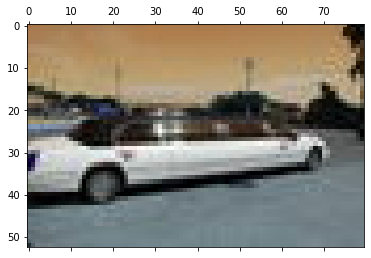

In [6]:
filepath = 'Test Images/image5367.jpg'
img = cv2.imread(filepath)
plt.matshow(img)
class_predict  = classify(filepath)
if(class_predict == ['Attire']):
    print('Attire')
if(class_predict == ['Decorationandsignage']):
    print('Decorationandsignage')
if(class_predict == ['Food']):
    print('Food')
if(class_predict == ['misc']):
    print('misc')

In [22]:
filepath = 'Test Images/image6245.jpg'
class_predict = classify(filepath)
Start = time.time()
for i in range(3218):
    image = subdf['Image'][i]
    class_predict  = classify("Test Images/"+str(image))
    if(class_predict == ['Attire']):
        subdf['Class'][i] = 'Attire'
    if(class_predict == ['Decorationandsignage']):
        subdf['Class'][i] = 'Decorationandsignage'
    if(class_predict == ['Food']):
        subdf['Class'][i] = 'Food'
    if(class_predict == ['misc']):
        subdf['Class'][i] = 'misc'

print(time.time()-Start)

c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\ajayb\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


61.9348349571228


In [23]:
subdf.head(3218)

,Image,Class
0,image6245.jpg,Decorationandsignage
1,image10409.jpg,Food
2,image8692.jpg,Attire
3,image10517.jpg,misc
4,image2580.jpg,Food
...,...,...
3213,image8222.jpg,misc
3214,image4968.jpg,misc
3215,image6673.jpg,misc
3216,image3442.jpg,misc


In [24]:
subdf.to_csv('test2.csv', index=False) 